# Running EMPIARreader

Example notebook to run empiarreader using Python commands. In this case, we open the EMPIAR entry [10943](https://www.ebi.ac.uk/empiar/EMPIAR-10943/). 

In [45]:
from empiarreader import EmpiarSource, EmpiarCatalog
import matplotlib.pyplot as plt 

test_entry = 10943

### Loading data from general directory

Every EMPIAR entry has an associated `xml` file which contains the default order of the directory. If that's the data you'd like to access, you can just load the entry onto an EmpiarCatalog. 

The `list` line allows you to see what directories can be chosen.

In [62]:
test_catalog = EmpiarCatalog(test_entry)

list(test_catalog.keys())

['Unaligned multi-frame movies in Tiff: Dataset 2']

To get the dataset from the catalog, you need to specify which directory to load. In this case, there is only one so we choose the `key` in the position `0`.

In [64]:
test_catalog_dir = list(test_catalog.keys())[0]

dataset_from_catalog = test_catalog[test_catalog_dir]

dataset_from_catalog

'Unaligned multi-frame movies in Tiff: Dataset 2':
  args:
    directory: data/Tiff
    empiar_index: 10943
    imageset_metadata:
      category: micrographs - multiframe
      data_format: TIFF
      details: "Movies were collected in EER format and converted into tiff using\
        \ relion_convert_to_tiff grouping frames by 34 giving a dose of 0.98 e/\xC5\
        ^2. Please see additional files for complete processing pipeline."
      directory: data/Tiff
      frame_range_max: null
      frame_range_min: null
      frames_per_image: 34
      header_format: TIFF
      image_height: null
      image_width: null
      micrographs_file_pattern: ''
      name: 'Unaligned multi-frame movies in Tiff: Dataset 2'
      num_images_or_tilt_series: 4000
      picked_particles_directory: ''
      picked_particles_file_pattern: ''
      pixel_height: 0.824
      pixel_width: 0.824
      segmentations: []
      voxel_type: UNSIGNED BYTE
  description: "Movies were collected in EER format and c

### Loading data from specific directory

However, not always the directory present in the `xml` is the intended target. We can further specify the directory to which folder we would like to get the images from. 

In [59]:
test_directory = "data/MotionCorr/job003/Tiff/EER/Images-Disc1/GridSquare_11149061/Data"

EMPIARreader can load the dataset from an EmpiarSource, using the entry number and the directory of the images. In this case, we also specify that we want the mrc files from the specified folder.

In [46]:
ds = EmpiarSource(
        test_entry,
        directory=test_directory,
        filename=".*EER\\.mrc",
        regexp=True,
    )

ds

empiar:
  args:
    directory: data/MotionCorr/job003/Tiff/EER/Images-Disc1/GridSquare_11149061/Data
    empiar_index: 10943
    filename: .*EER\.mrc
    regexp: true
  description: ''
  driver: empiarreader.empiar.empiar.EmpiarSource
  metadata: {}


The dataset is loaded lazily (using dask), so the images are loaded one at a time when read_partition is called. In this case, we call partition number 10.

In [47]:
part = ds.read_partition(10)
part

<xarray.DataArray (y: 4096, x: 4096)>
array([[1.275, 1.767, 1.378, ..., 3.824, 3.062, 3.447],
       [2.566, 2.174, 1.81 , ..., 3.91 , 3.316, 4.133],
       [8.71 , 2.22 , 2.363, ..., 4.145, 3.604, 3.492],
       ...,
       [4.17 , 4.105, 3.896, ..., 3.602, 3.441, 3.996],
       [3.812, 3.564, 3.941, ..., 3.719, 3.145, 3.734],
       [4.08 , 3.922, 3.68 , ..., 3.24 , 3.508, 5.16 ]], dtype=float16)
Coordinates:
  * y        (y) int64 0 1 2 3 4 5 6 7 ... 4089 4090 4091 4092 4093 4094 4095
  * x        (x) int64 0 1 2 3 4 5 6 7 ... 4089 4090 4091 4092 4093 4094 4095
Attributes:
    filename:    https://ftp.ebi.ac.uk/empiar/world_availability/10943/data/M...
    voxel_size:  (0.824, 0.824, 1.)

### Visualising data

In this cell, we loop over the first four images in the dataset and visualise them.

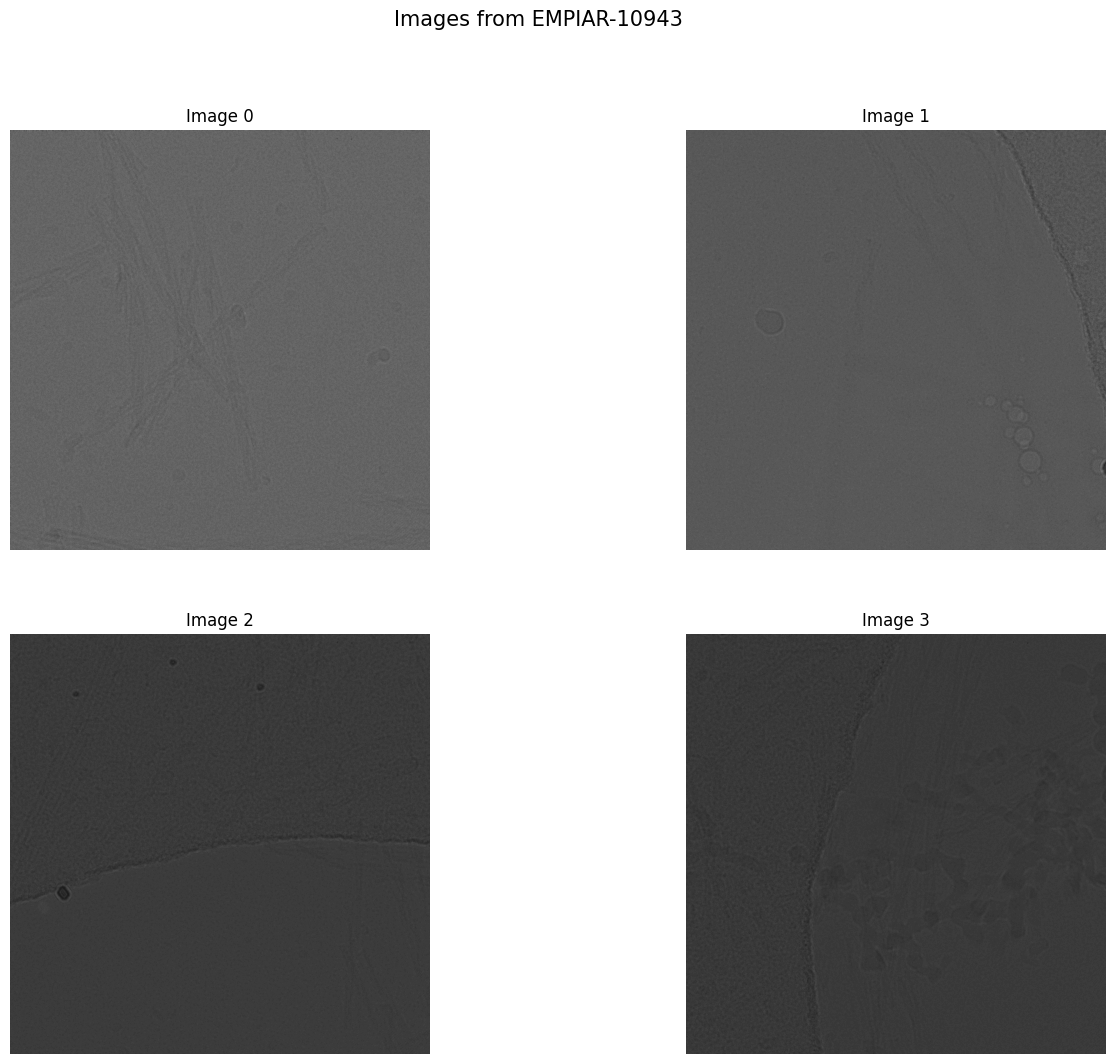

In [55]:
title = "Images from EMPIAR-"+str(test_entry)
plt.figure(figsize=(16, 12))
plt.suptitle(title, fontsize=15)

for i in range(4):
    part = ds.read_partition(i)
    image_part = part.data
    ax = plt.subplot(2, 2, i+1)

    plt.imshow(
        image_part,cmap='gray',
    )
    ax.set_title("Image "+str(i))
    ax.axis("off")
    ax.set_xlabel("")
